In [1]:
conda install seaborn matplotlib scipy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [21]:
# adjusting so I can see all columns
pd.set_option('display.max_columns', None)

In [3]:
path = r"C:\Users\Kieran\Documents\Career Foundry\Data Immersion\4.0 Python\Instacart Basket Analysis"

In [4]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.8 ords_prods.pkl'))

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spend_flag,order_freq,order_freq_flag
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New Customer,6.084746,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New Customer,6.084746,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,both,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New Customer,6.084746,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Mid-range product,Least busy,Slowest days,Average orders,10,New Customer,6.084746,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,both,...,Mid-range product,Least busy,Slowest days,Most orders,10,New Customer,6.084746,Low spender,20.0,Regular customer


# Categorical data charts

### Bar Charts

<AxesSubplot:>

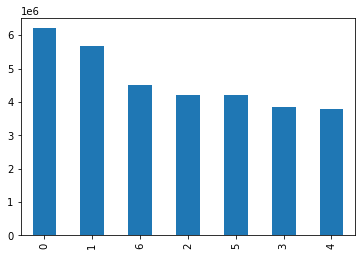

In [61]:
# running the plot function on the frequency of values in orders day of the week
df['orders_day_of_the_week'].value_counts().plot.bar()

### Exporting 

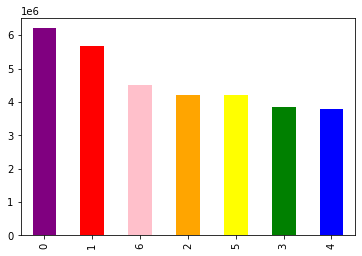

In [10]:
#saving within an object
bar = df['orders_day_of_the_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [63]:
# save as an image
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

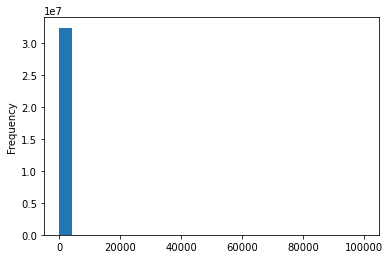

In [12]:
# histogram of prices column
df['prices'].plot.hist(bins = 25)

In [13]:
df['prices'].describe()

count    3.240486e+07
mean     1.153842e+01
std      4.956592e+02
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      9.999900e+04
Name: prices, dtype: float64

The one bar histogram is being caused by a very large max value in the data. This should be picked up when checking data integrity. 

In [15]:
df['prices'].mean()

11.538421722495382

In [16]:
df['prices'].median()

7.0

### Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

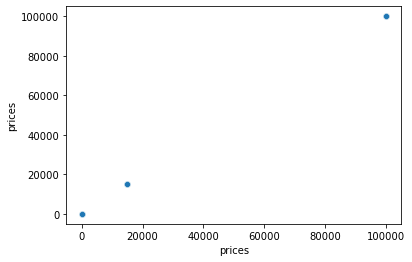

In [14]:
sns.scatterplot(x = 'prices', y = 'prices', data = df)

Using prices for both axis. We'd expect data points to be distributed around the mean, but there are two points far away from this. 20,000 and 100,000. The 100,000 corresponds to the max value we found before.

Checking for outliers (any item above $100)

In [24]:
df_outlier = df.loc[df['prices'] > 100]

In [25]:
df_outlier.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spend_flag,order_freq,order_freq_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular Customer,108.319728,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900,High-range product,Regularly busy,Regularly busy,Fewest orders,40,Regular Customer,108.319728,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900,High-range product,Regularly busy,Regularly busy,Average orders,4,New Customer,1154.346154,High spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900,High-range product,Busiest day,Busiest days,Average orders,4,New Customer,1154.346154,High spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900,High-range product,Regularly busy,Busiest days,Average orders,16,Regular Customer,113.971223,High spender,20.0,Regular customer


In [26]:
df_outlier['product_name'].value_counts(dropna = False)

Lowfat 2% Milkfat Cottage Cheese    4429
2 % Reduced Fat  Milk                698
Name: product_name, dtype: int64

These two products are causing the outlier values

For now, marking them as missing values

In [49]:
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [50]:
df['prices'].max()

25.0

Note: This step should of been completed as part of data cleaning

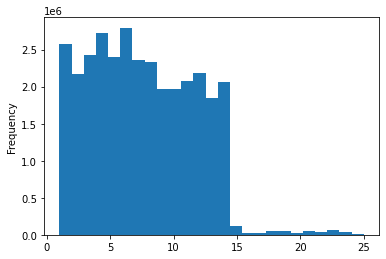

In [51]:
hist = df['prices'].plot.hist(bins = 25)

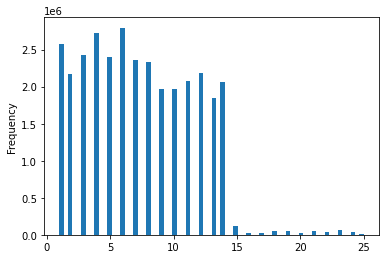

In [52]:
hist2 = df['prices'].plot.hist(bins = 70)

In [67]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist prices.png'))

## Line Charts

We could create line chart based on prices. Because there are so many unique datapoints, likely to get a memory error. To avoid this we can take sample of data.

### Sampling

Important to randomly sample from the data to accurately reflect the whole dataframe

1) Set seed for random number generator  
2) Create 32M (length of df) random numbers ranging between 0 and 1  
3) Code a logical test comparing each of those numbers to value of 0.7  
4) Store results of test in list, dev

In [68]:
# sets a random but reproducible pattern
np.random.seed(4)

In [69]:
# list that stores boolean values based on whether random assigned value in df is less than or equal to 0.7
dev = np.random.rand(len(df)) <=0.7

In [70]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [71]:
len(dev)

32404859

In [72]:
len(df)

32404859

We now have 32M boolean values, 70% of which are True and 30% of which are false.  
Also have 32M rows of data.

In [73]:
# store 70% of the sample in dataframe big
big = df[dev]

In [74]:
# store 30% of sample in dataframe small
small = df[~dev]

Double checking samples are correct size:

In [75]:
len(df)

32404859

In [76]:
len(big) + len(small)

32404859

We only need the orders_day_of_the_week and prices columns of our sample data:

In [77]:
df_2 = small[['orders_day_of_the_week', 'prices']]

All these steps have made the data smaller and easier to work with whilst still maintaining statistical integrity

### Creating line chart

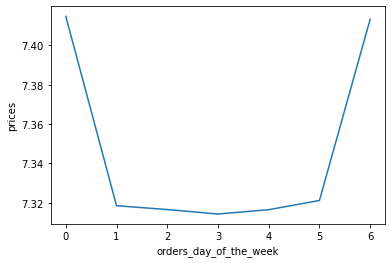

In [78]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')